In [1]:
# 读取monitor/synthetic_mixed_rate/synthetic_mixed_rate.tsv文件

import pandas as pd
import numpy as np

def read_synthetic_mixed_rate(file_path='../monitor/synthetic_mixed_rate/synthetic_mixed_rate.tsv'):
    df = pd.read_csv(file_path, sep='\t')
    # 设置df的列名
    df.columns = ["exp_name", "num_models",
               "num_devices", "num_devices_per_node", "mem_budget", "total_rate", "rate_distribution",
               "arrival_process", "arrival_process_kwargs", "slo_scale", "duration",
               "policy_name", "placement", "goodput", "mode", "solver_time"]
    return df
df = read_synthetic_mixed_rate()

ParserError: Error tokenizing data. C error: Expected 14 fields in line 318, saw 15


In [59]:
df = df[df['num_devices'] == 4]

In [60]:
# rate_list = [1, 2, 3, 5, 10, 20]
# policies = ["my-mp-ilp", "my-mp-ilp-replace-600", "my-mp-ilp-dynamic", "mp-search-sep", "sr-greedy", "sr-replace-600"]

policies = df['policy_name'].unique()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast

def plot_goodput_vs_target(df, policies, target):
    """
    绘制不同策略下 Goodput 随目标变量变化的折线图。

    参数:
    df : DataFrame - 包含政策、目标变量和 Goodput 的数据框。
    policies : list - 策略名称列表。
    target : str - 变量目标名。
    """
    # Set the style for the plot
    sns.set(style="whitegrid")
    if target in ast.literal_eval(df['arrival_process_kwargs'][0]).keys():
        # 创建新的列，列名为target，列值为ast.literal_eval(df['arrival_process_kwargs'][target])
        df[target] = df['arrival_process_kwargs'].apply(lambda x: ast.literal_eval(x)[target])

    target_list = df[target].unique()
    target_list.sort()

    # Calculate goodput for each policy and target
    goodput_list = []
    for policy in policies:
        policy_goodput_list = []
        for t in target_list:
            df_policy_target = df[(df.policy_name == policy) & (df[target] == t)]
            policy_goodput_list.append(df_policy_target.goodput.mean())
        goodput_list.append(policy_goodput_list)

    # Create the plot
    plt.figure(figsize=(10, 6))
    for i in range(len(policies)):
        plt.plot(target_list, goodput_list[i], marker='o', label=policies[i], linewidth=2)

    # Add labels and title
    plt.xlabel(target, fontsize=14)
    plt.ylabel("Goodput", fontsize=14)
    plt.title(f"Goodput vs. {target}", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid for better readability
    plt.grid(True)

    # Add legend outside the plot
    plt.legend(title="Policies", fontsize=12, title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

    # # Save the figure as a high-resolution image
    # plt.savefig("goodput_vs_target.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage:
plot_goodput_vs_target(df, policies, 'total_rate')

NameError: name 'policies' is not defined

In [4]:
plot_goodput_vs_target(df, policies, 'slo_scale')

NameError: name 'df' is not defined

In [69]:
file_path = '../monitor/synthetic_mixed_num_devices/synthetic_mixed_rate.tsv'
df = read_synthetic_mixed_rate(file_path=file_path)

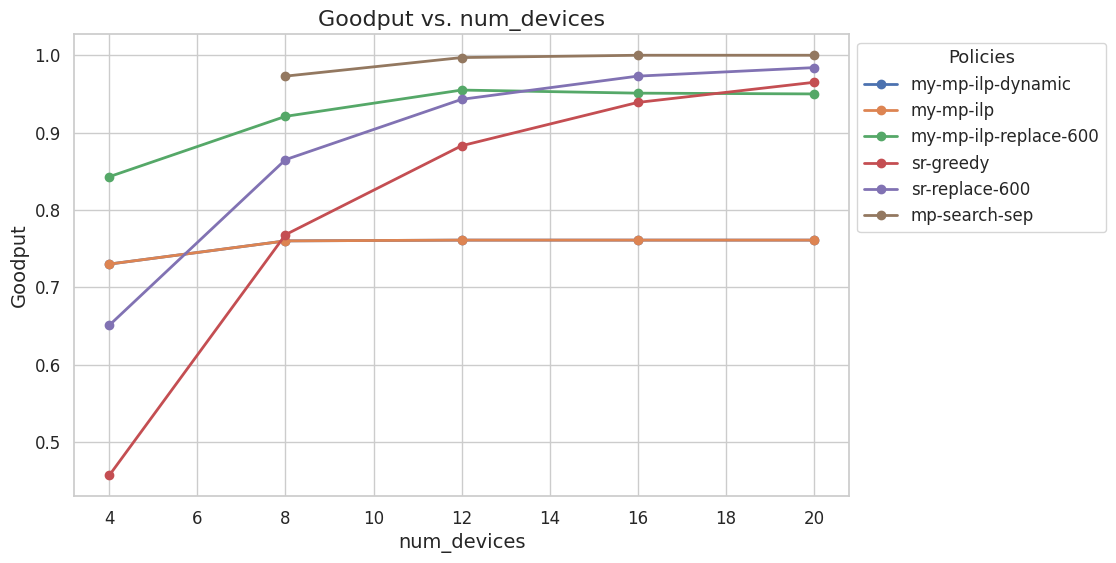

In [68]:
df = df[df['exp_name'] == 'goodput_vs_num_devices']
policies = df['policy_name'].unique()
plot_goodput_vs_target(df, policies, 'num_devices')

In [5]:
import pandas as pd
import numpy as np

def read_synthetic_mixed_rate(file_path='../monitor/synthetic_mixed_rate/synthetic_mixed_rate.tsv'):
    df = pd.read_csv(file_path, sep='\t')
    # 设置df的列名
    df.columns = ["exp_name", "num_models",
               "num_devices", "num_devices_per_node", "mem_budget", "total_rate", "rate_distribution",
               "arrival_process", "arrival_process_kwargs", "slo_scale", "duration",
               "policy_name", "placement", "goodput", "mode", "solver_time"]
    return df
df = read_synthetic_mixed_rate(file_path="../monitor/azure_v1_exp/azure_v1_rate.tsv")
df

,exp_name,num_models,num_devices,num_devices_per_node,mem_budget,total_rate,rate_distribution,arrival_process,arrival_process_kwargs,slo_scale,duration,policy_name,placement,goodput,mode,solver_time
0,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.0001, 'cv_scale': 4, 'trace_d...",5,-1,sr-greedy,ModelPlacement(group_configs=(ParallelConfig(d...,0.651,simulate,6.129
1,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.0001, 'cv_scale': 4, 'trace_d...",5,-1,sr-replace-600,ModelPlacementWithReplacement(num_segments=6),0.675,simulate,5.865
2,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.0003, 'cv_scale': 4, 'trace_d...",5,-1,my-mp-ilp,ModelPlacement(group_configs=[ParallelConfig(d...,0.686,simulate,1.966
3,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.0001, 'cv_scale': 4, 'trace_d...",5,-1,my-mp-ilp-dynamic,ModelPlacementWithReplacement(num_segments=1),0.661,simulate,1.994
4,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.0001, 'cv_scale': 4, 'trace_d...",5,-1,my-mp-ilp,ModelPlacement(group_configs=[ParallelConfig(d...,0.661,simulate,2.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.006, 'cv_scale': 4, 'trace_di...",5,-1,my-mp-ilp-dynamic,ModelPlacementWithReplacement(num_segments=79),0.211,simulate,151.435
156,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.007, 'cv_scale': 4, 'trace_di...",5,-1,sr-greedy,ModelPlacement(group_configs=(ParallelConfig(d...,0.320,simulate,0.391
157,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.007, 'cv_scale': 4, 'trace_di...",5,-1,sr-replace-600,ModelPlacementWithReplacement(num_segments=6),0.324,simulate,0.582
158,goodput_vs_rate_scale,12,4,2,13958643712,5,NaN,azure_v1,"{'rate_scale': 0.007, 'cv_scale': 4, 'trace_di...",5,-1,mp-search-sep,ModelPlacement(group_configs=(ParallelConfig(d...,0.320,simulate,2.893


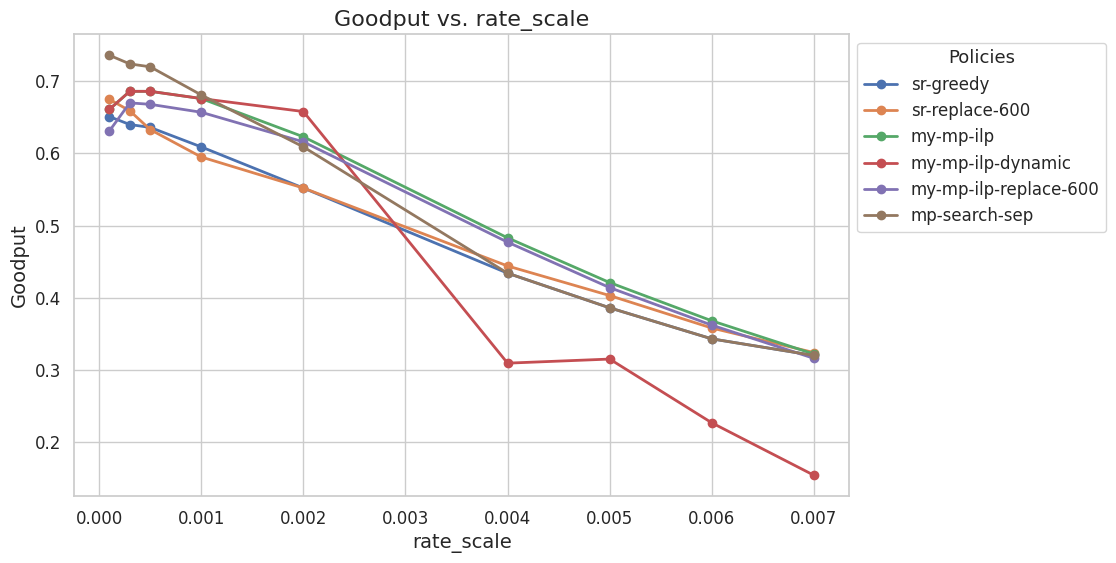

In [6]:
df = df[df['exp_name'] == 'goodput_vs_rate_scale']
policies = df['policy_name'].unique()
plot_goodput_vs_target(df, policies, "rate_scale")

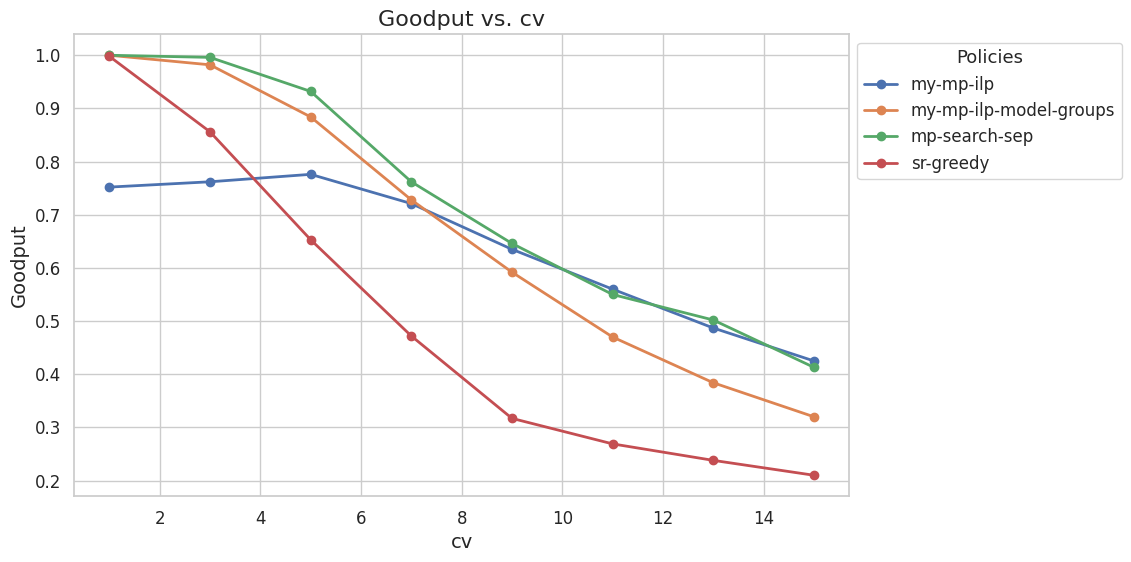

In [6]:
import pandas as pd
import numpy as np

def read_synthetic_mixed_rate(file_path='../monitor/synthetic_mixed_rate/synthetic_mixed_rate.tsv'):
    # 读取文件,文件第一行为列名
    df = pd.read_csv(file_path, sep='\t')
    return df

df = read_synthetic_mixed_rate(file_path='../monitor/goodput_vs_cv_group_models/group_models_synthetic.tsv')
df = df[df['exp_name'] == 'goodput_vs_cv']
policies = df['policy_name'].unique()
plot_goodput_vs_target(df, policies, "cv")

In [7]:
def plot_solver_time_by_target(df, policies, target):
    """
    绘制不同目标下每个策略的 solver_time 的柱状图。

    参数:
    df : DataFrame - 包含政策、目标变量和 solver_time 的数据框。
    policies : list - 策略名称列表。
    target : str - 变量目标名。
    """
    # Set the style for the plot
    sns.set(style="whitegrid")

    if target in ast.literal_eval(df['arrival_process_kwargs'][0]).keys():
        # 创建新的列，列名为target，列值为ast.literal_eval(df['arrival_process_kwargs'][target])
        df[target] = df['arrival_process_kwargs'].apply(lambda x: ast.literal_eval(x)[target])

    # 只选择包含目标和政策的行
    df = df[df['policy_name'].isin(policies)]

    # Calculate mean solver_time for each policy and target
    mean_solver_time = df.groupby(['policy_name', target])['solver_time'].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=target, y='solver_time', hue='policy_name', data=mean_solver_time, ci=None)

    # Add labels and title
    plt.xlabel(target, fontsize=14)
    plt.ylabel("Average Solver Time", fontsize=14)
    plt.title(f"Average Solver Time by {target}", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid for better readability
    plt.grid(True)

    # Add legend
    plt.legend(title="Policies", fontsize=12, title_fontsize='13', loc='upper right')

    # Save the figure as a high-resolution image
    # plt.savefig("solver_time_by_target.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

/tmp/ipykernel_45275/2028839683.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=target, y='solver_time', hue='policy_name', data=mean_solver_time, ci=None)


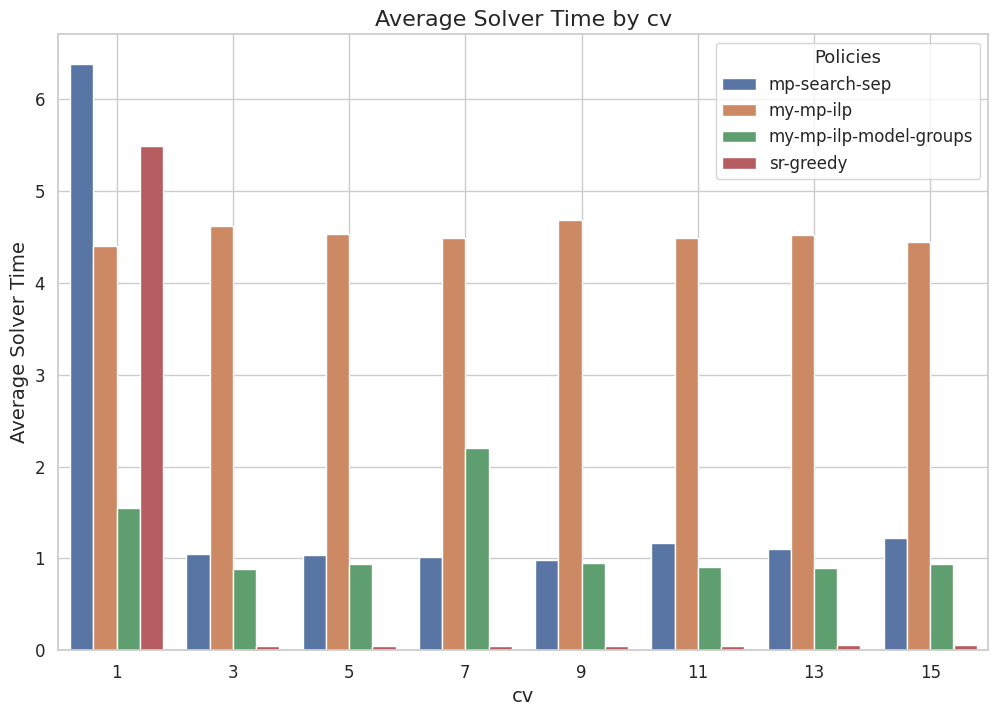

In [8]:
plot_solver_time_by_target(df, policies, 'cv')

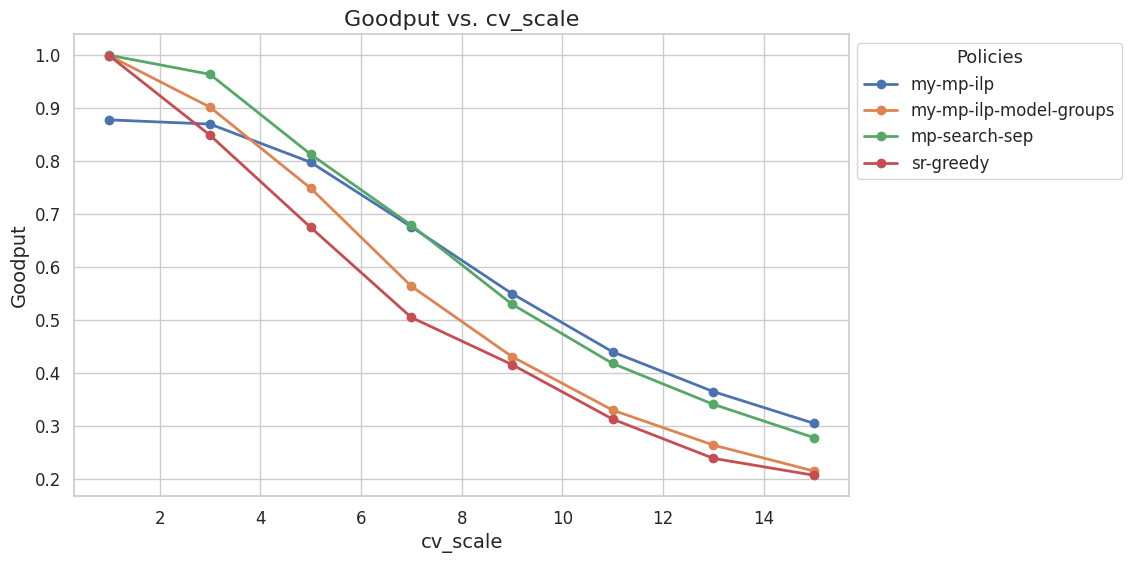

In [18]:
df = read_synthetic_mixed_rate(file_path='../monitor/goodput_vs_cv_group_models/group_models_azure_v1.tsv')
df = df[df['exp_name'] == 'goodput_vs_cv_scale']
policies = df['policy_name'].unique()
plot_goodput_vs_target(df, policies, "cv_scale")

/tmp/ipykernel_45275/2028839683.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=target, y='solver_time', hue='policy_name', data=mean_solver_time, ci=None)


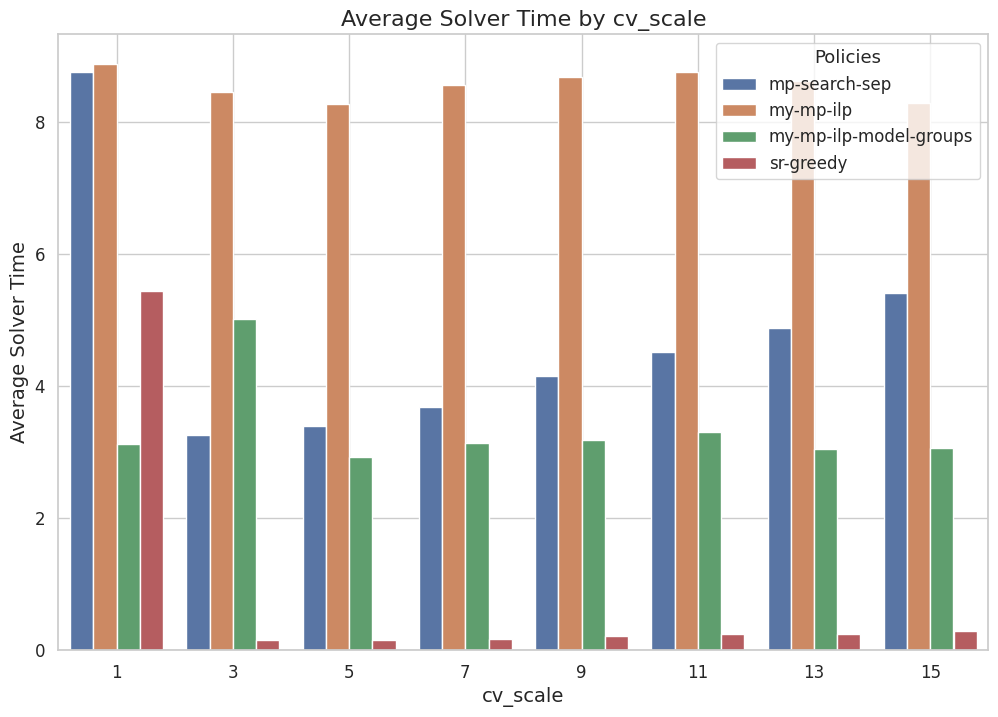

In [19]:
plot_solver_time_by_target(df, policies, 'cv_scale')

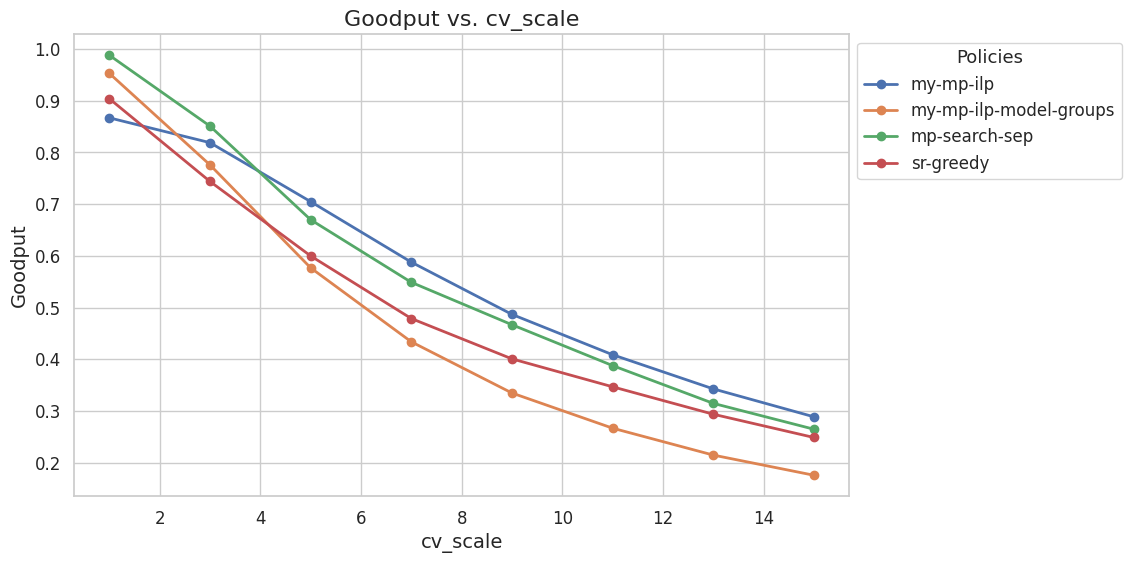

In [20]:
df = read_synthetic_mixed_rate(file_path='../monitor/goodput_vs_cv_group_models/group_models_azure_v2.tsv')
df = df[df['exp_name'] == 'goodput_vs_cv_scale']
policies = df['policy_name'].unique()
plot_goodput_vs_target(df, policies, "cv_scale")

/tmp/ipykernel_45275/2028839683.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=target, y='solver_time', hue='policy_name', data=mean_solver_time, ci=None)


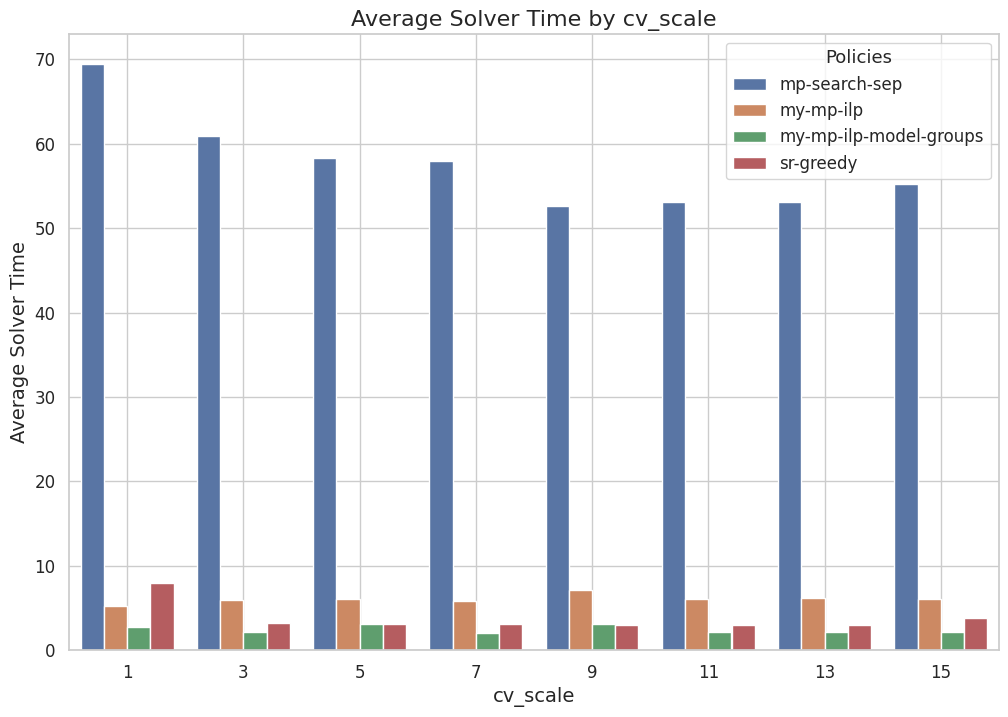

In [21]:
plot_solver_time_by_target(df, policies, 'cv_scale')

问题发现：
在低请求量和请求量均匀的情况下，模型进行分组对集群总的goodput性能的增益更好。

问题解释：
若模型分组，模型只能用到一部分的集群资源，通过并行放置得到的增益会减少，在低请求量和请求量均匀时模型分组能够通过优化资源的分配和提高负载均衡来增强集群的 overall goodput，但在高请求量和请求量不均匀时无法更好地利用集群资源通过并行提高性能增益。